### 方案 1：**作物的替代性与互补性**

在现实中，不同农作物之间可能存在替代性和互补性。替代性意味着两种作物之间具有竞争关系，种植其中一种作物意味着减少另一种作物的种植。而互补性意味着种植一种作物可能促进另一种作物的种植，二者存在协同效应。为了合理规划2024-2030年农作物的种植策略，考虑作物的替代性和互补性可以使优化模型更加精确和实际。下面对这两个概念进行详细描述，并说明如何在模型中反映。

#### 1. **替代性（Substitutability）**
作物的替代性意味着在相同的资源和条件下，种植一种作物会减少另一种作物的种植机会。例如，玉米和大豆可能在相同的土壤条件下竞争种植，因此增加玉米的种植面积意味着必须减少大豆的种植面积。

##### 1.1. 替代性约束
为了表达替代性，我们可以设定约束条件，确保在同一块地上只能选择种植一种作物，而不能同时种植具有替代性的作物。具体而言：
- 假设作物 $j$ 和作物 $k$ 之间具有替代性，则在同一块地的同一季节，它们的种植面积之和不应超过可用的土地面积。数学上，可以用以下约束表示：
  $$
  x_{i,j,t} + x_{i,k,t} \leq 1 \quad \forall i, \forall t
  $$
  其中，$x_{i,j,t}$ 表示地块 $i$ 在季节 $t$ 种植作物 $j$ 的决策变量，$x_{i,k,t}$ 表示同一块地在同一季节种植作物 $k$ 的决策变量。这一约束确保了作物 $j$ 和作物 $k$ 之间不能同时在同一地块种植。

##### 1.2. 替代性在模型中的影响
在现实中，替代性可能受到市场需求、资源配置和作物特性等因素的影响。例如，如果某一作物的市场需求增加，可能会导致其替代性作物的种植减少。因此，在构建优化模型时，替代性可以通过对作物的决策变量加以约束，来保证种植决策在有限资源条件下的合理性。

#### 2. **互补性（Complementarity）**
互补性意味着两种作物之间的协同效应。种植一种作物可能会促进另一种作物的生长，或者在种植后产生良好的轮作效果。例如，豆类作物通常会为土壤添加氮肥，这对于接下来种植的其他作物有利，因此豆类与其他作物可能具有互补性。

##### 2.1. 互补性约束
互补性可以通过联合种植或相邻种植的方式反映在模型中。互补性表示的是，如果种植了一种作物，可能会增加另一种作物的种植收益或者有利于土壤的健康。在模型中，可以通过以下方式表达互补性：
- 假设作物 $j$ 和作物 $k$ 之间具有互补性，则我们可以通过设定一个正的关联系数 $b_{j,k}$ 来表示二者的协同效应。具体地，互补性可以反映在目标函数中，通过附加一个奖励项来增强种植多种互补作物的收益：
  $$
  Z = Z_0 + \sum_{j=1}^{M} \sum_{k=1}^{M} b_{j,k} \cdot (x_{i,j,t} + x_{i,k,t})
  $$
  其中，$Z_0$ 是基础利润，$b_{j,k}$ 是作物 $j$ 和作物 $k$ 之间的互补性系数。如果 $b_{j,k}$ 为正，表示作物 $j$ 和作物 $k$ 之间具有互补性，种植两者会增加总收益。




In [1]:
## 导入会使用到的库
%config InlineBackend.figure_format = 'retina'
%matplotlib inline    
import seaborn as sns 
sns.set(font= "simhei",style="whitegrid",font_scale=1.6)
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False # 解决坐标轴的负号显示问题
## 导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px

## 忽略提醒
import warnings
warnings.filterwarnings("ignore")

df1 = pd.read_excel('数据\\附件1.xlsx',sheet_name=0)
df2 = pd.read_excel('数据\\附件1.xlsx',sheet_name=1)
df3 = pd.read_excel('数据\\附件2.xlsx',sheet_name=0)
df4 = pd.read_excel('数据\\附件2.xlsx',sheet_name=1)

#对附件1的sheet2做处理
ls = []
for name,typ,soils in zip(df2.作物名称,df2.作物类型,df2.种植耕地):
    for soil in soils.split('\n\n'):
        ls.append([name,typ,soil])
d = pd.DataFrame(ls,columns=['作物名称','作物类型','种植耕地'])

ls1 = []
ls2 = []
for i in d.种植耕地:
    if '季' in i:
        ls1.append(i.split(' ')[0])
        ls2.append(i.split(' ')[-1].replace('\n',''))
    else:
        ls1.append(i.replace('\n',''))
        ls2.append('单季')
d['种植耕地'] = ls1

#将字段进行差分
ls1 = []
ls2 = []
for i in d.作物类型:
    if '豆类' in i:
        ls1.append(i.split('（')[0])
        ls2.append('是')
    else:
        ls1.append(i)
        ls2.append('不是')
d['作物类型'] = ls1
d['是否豆类'] = ls2
df2 = d

#同样的逻辑，将附件2的sheet1处理
df3.columns = ['地块名称', '作物编号', '作物名称', '作物类型', '种植面积/亩', '种植季次']
df3 = pd.merge(df1,df3,how='right',on='地块名称')

df3 = pd.DataFrame(df3.groupby(['地块类型','作物编号']).sum()[['种植面积/亩']])
ls1 = []
ls2 = []
for i,o in df3.index:
    ls1.append(i)
    ls2.append(o)
df3['地块类型'] = ls1
df3['作物编号'] = ls2
df3.reset_index(drop=True,inplace=True)

#数据合并
df4 = pd.merge(df4,df3,how='left',on=['地块类型','作物编号']).fillna(0)
df4['地块类型'] = [i.replace(' ','') for i in df4.地块类型]

df2.columns = ['作物名称', '作物类型', '地块类型', '是否豆类']

result = pd.merge(df4,df2,how='left',on=['作物名称', '地块类型'])
result.to_excel('处理后数据.xlsx',index=False)

ls = []
for i in result['销售单价/(元/斤)']:
    n = float(i.split('-')[0])
    m = float(i.split('-')[1])
    ls.append((n+m)/2)
result['平均销售单价'] = ls

result['总销量'] = result['亩产量/斤']*result['种植面积/亩']
result['总成本'] = result['平均销售单价']*result['种植面积/亩']
result['总盈利'] = result['总销量']*result['平均销售单价']-result['总成本']

df = result.copy()

for index,i in enumerate(df['地块类型'].unique()):
    df.loc[df.地块类型==i,'地块类型'] = index
df = df.sort_values(by=['地块类型','作物编号'])
for index,i in enumerate(df['作物类型'].unique()):
    df.loc[df.作物类型==i,'作物类型'] = index
for index,i in enumerate(df1['地块类型'].unique()):
    df1.loc[df1.地块类型==i,'地块类型'] = index
df['种植产量'] = df['亩产量/斤']*df['种植面积/亩']

for index,i in enumerate(df['作物类型'].unique()):
    df.loc[df.作物类型==i,'作物类型'] = index

ls1 = []
ls2 = []
ls3 = []
ls4 = []
ls5 = []
ls6 = []
for index,i in enumerate(zip(df.作物类型,df.种植季次,df.地块类型,df.作物名称)):
    if i[0] == 0 and i[3] != '水稻':
        ls1.append(index)
    elif i[3] == '水稻':
        ls2.append(index)
    elif (i[2] == 4 or i[2] == 5) and i[0] != 2:
        ls6.append(index)
    elif i[0] == 2:
        ls5.append(index)
    elif i[1] == '第一季':
        ls3.append(index)
    elif i[1] == '第二季':
        ls4.append(index)
bean = []
for index,i in enumerate(df['是否豆类']):
    if i =='是':
        bean.append(index)
        
def find_indices(lst, element):
    return [index for index, value in enumerate(lst) if value == element]
#多余的作物需要花费的成本
def function(sales_min1,sales_min2,sales_min3):
    for i in sales_min1.keys():
        total = 0
        index_ls = find_indices(land_types, i)

        total_product1 = sum([yields[j]*areas[i]*x[i][j][o]*0.25 for i in range(num_plots) for j in index_ls for o in range(2)])
        total_product2 = sum([yields[j]*areas[i]*x[i][j][o]*0.25 for i in range(num_plots) for j in index_ls for o in range(2,4)])
        total_product3 = sum([yields[j]*areas[i]*x[i][j][o]*0.25 for i in range(num_plots) for j in index_ls for o in range(4,6)])

        if total_product1 <= sales_min1[i]:
            pass
        else:
            total += (total_product-sales_min1[i])*prices[index_ls[0]]
        if total_product2 <= sales_min2[i]:
            pass
        else:
            total += (total_product-sales_min2[i])*prices[index_ls[0]]
            
        if total_product3 <= sales_min3[i]:
            pass
        else:
            total += (total_product-sales_min3[i])*prices[index_ls[0]]
    return total

为了构建一个科学的互斥互补矩阵，基于实际的作物生理特性和种植实践，以下几点在考虑作物替代性和互补性时的重要依据。

#### 1. **豆类作物的互补性**：
- **豆类作物（如黄豆、黑豆、红豆、绿豆等）**通过固氮作用提升土壤肥力，可以为接下来种植的作物（如谷物、蔬菜等）提供更多的氮素。因此，豆类作物通常与其他作物（特别是耗氮作物如玉米、谷类作物）存在互补关系。
- 豆类作物之间，如黄豆与绿豆、红豆等，通常因为占用相同的土壤资源而有一定的竞争性，可能是互斥的。

#### 2. **谷物作物的替代性**：
- **谷物作物（如小麦、玉米、谷子、高粱、大麦等）**通常具有强烈的替代性，因为它们需要相似的养分（如氮、磷、钾等），且常常种植在相似的条件下。这些作物的轮作可以减少土壤肥力的过度耗竭，但不宜同时种植。
- 不同谷物作物之间的种植通常会相互竞争资源，如玉米和小麦、高粱之间可能具有较强的互斥性。

#### 3. **根茎类作物的特殊性**：
- **根茎类作物（如土豆、红薯等）**通常与其他作物互补性较弱，因为它们的生长周期较长，根系发达，且消耗较多的土壤资源。与叶类作物（如菠菜、芹菜等）有一定的互补性，但与其他根茎类作物可能存在竞争。

#### 4. **蔬菜类作物的互补性**：
- 蔬菜类作物（如西红柿、茄子、菠菜、黄瓜等）通常可以通过轮作与谷物、豆类作物形成互补性，以维持土壤肥力。
- 蔬菜之间的互补性较弱，因为它们通常在生长周期、对光照和水分的需求上类似，容易在有限的资源下产生竞争。

#### 5. **菌类作物与其他作物的互补性**：
- **菌类作物（如香菇、榆黄菇、羊肚菌等）**常常作为轮作作物，菌类通常种植在不同的栽培介质上（如木材、秸秆等），因此与大多数植物作物并不存在直接的竞争，具有较好的互补性。菌类作物可以有效利用农作物的副产物（如稻草、秸秆等），因此适合与大部分作物搭配。


#### 基于上述描述，我们可以构建对应的互补互斥矩阵

In [2]:
plants = df.作物名称.values

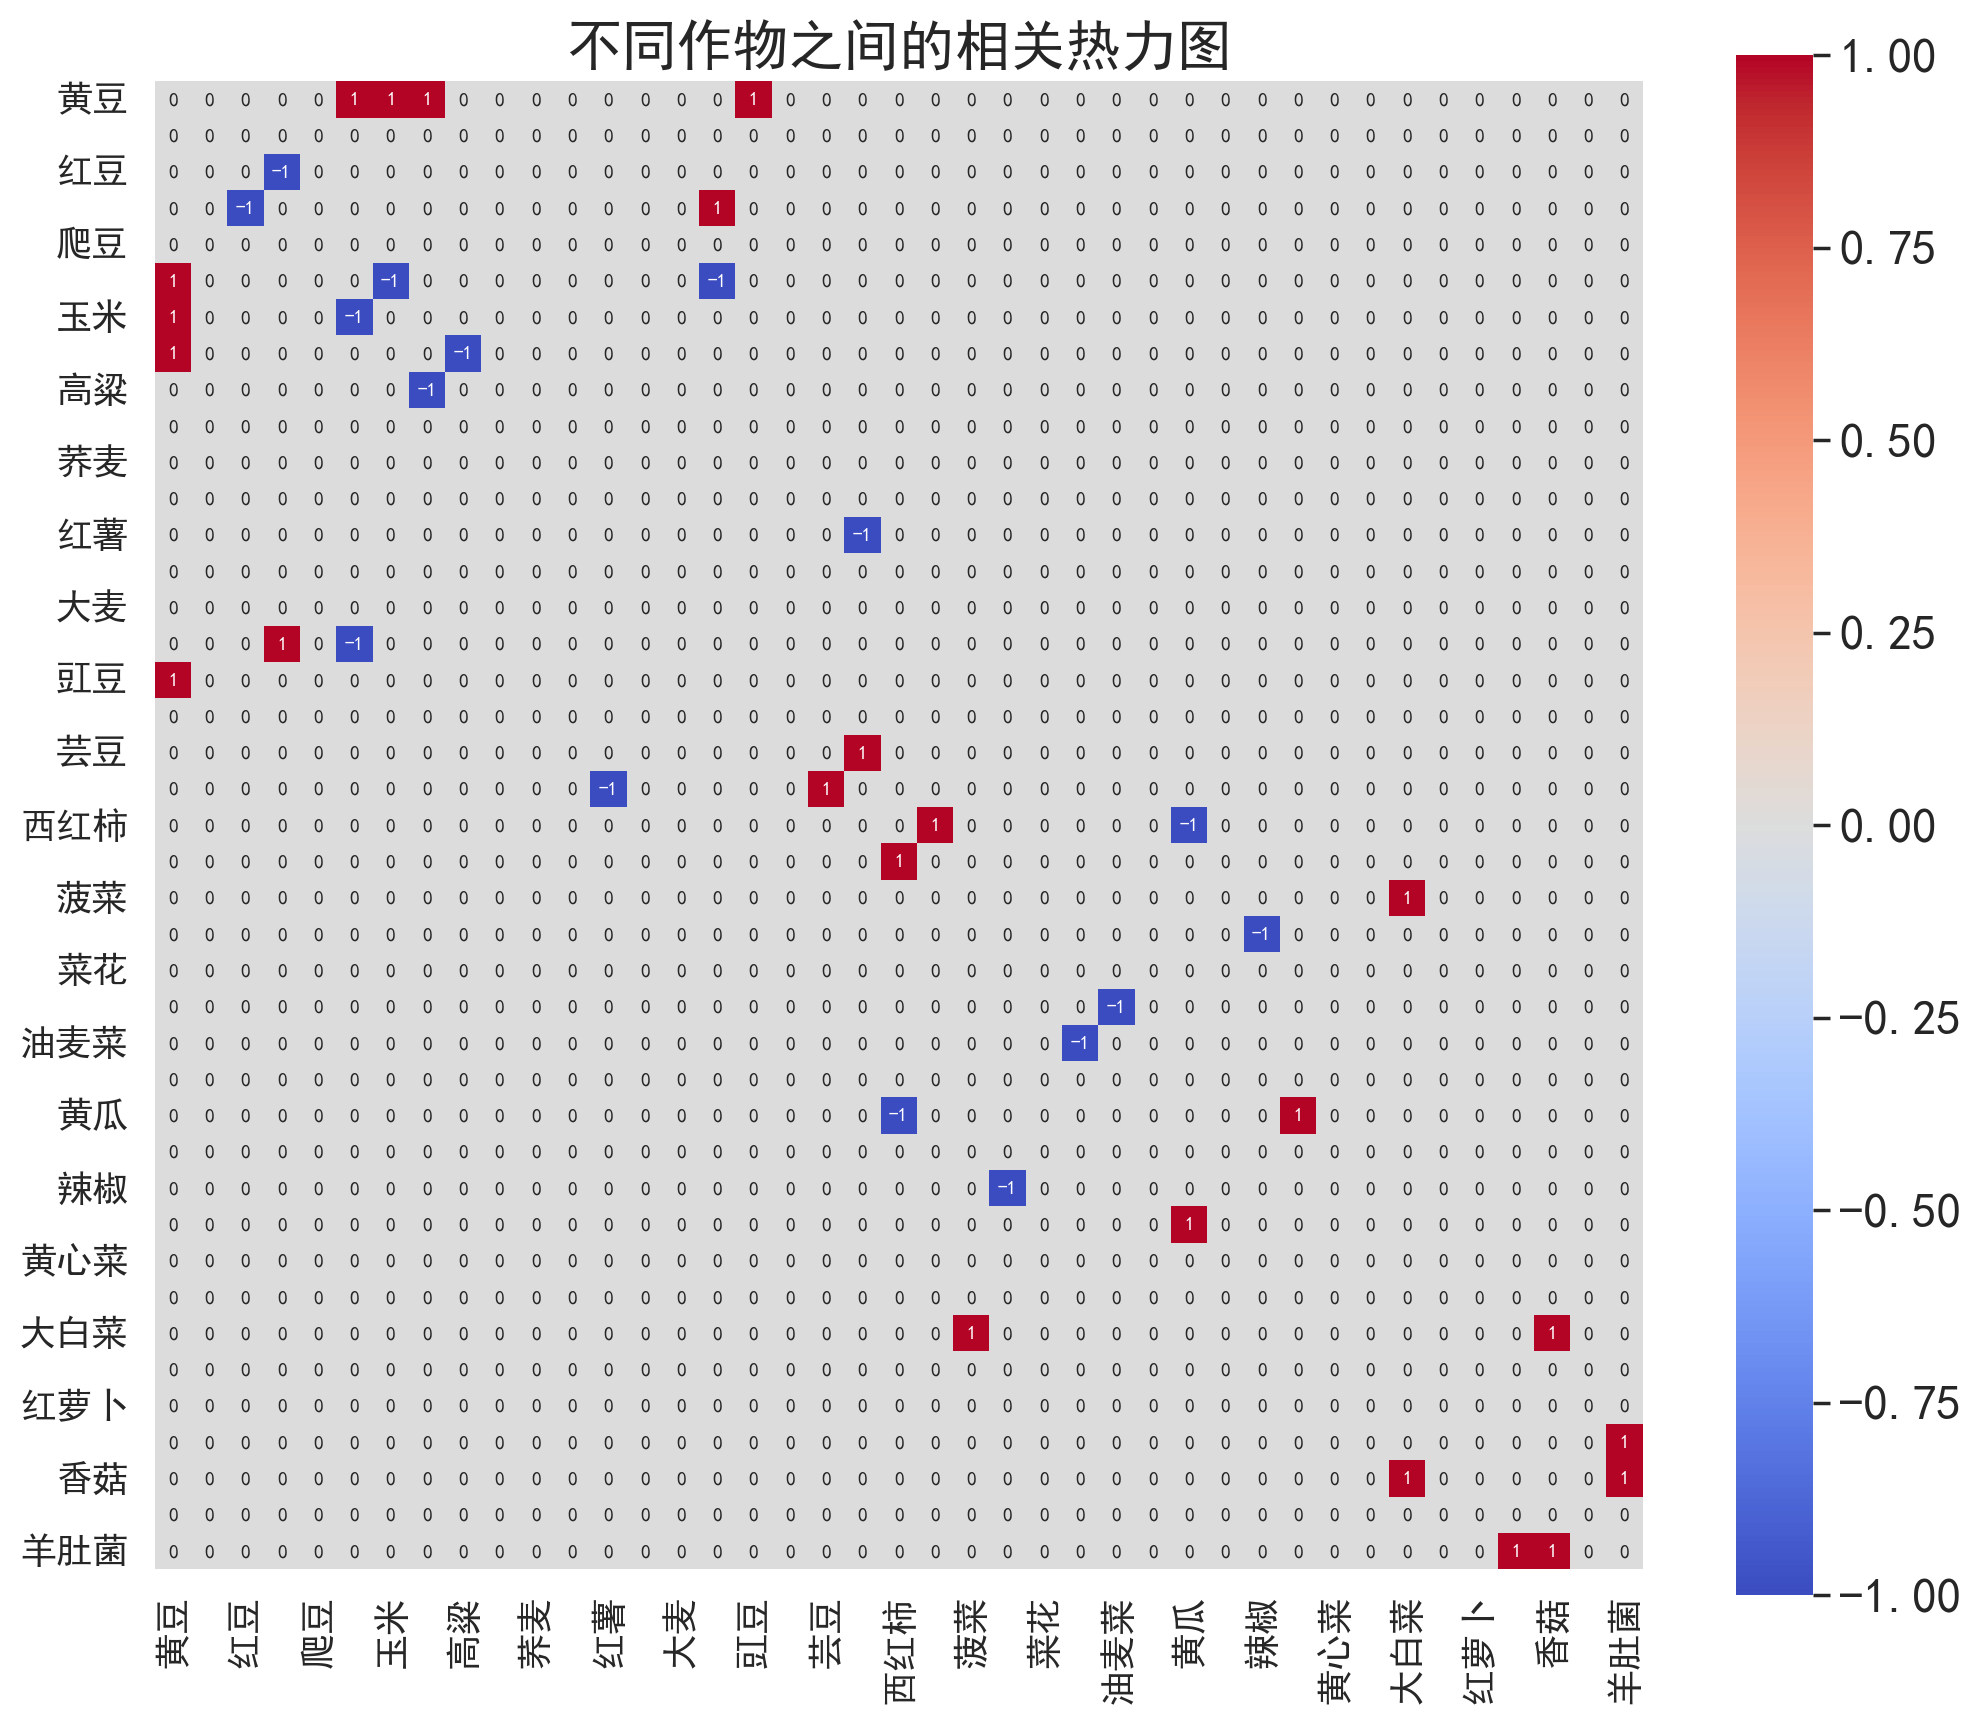

In [3]:
import numpy as np
import pandas as pd

# 植物列表
plants = ['黄豆', '黑豆', '红豆', '绿豆', '爬豆', '小麦', '玉米', '谷子', '高粱', '黍子', '荞麦',
          '南瓜', '红薯', '莜麦', '大麦', '水稻', '豇豆', '刀豆', '芸豆', '土豆', '西红柿', '茄子',
          '菠菜', '青椒', '菜花', '包菜', '油麦菜', '小青菜', '黄瓜', '生菜', '辣椒', '空心菜',
          '黄心菜', '芹菜', '大白菜', '白萝卜', '红萝卜', '榆黄菇', '香菇', '白灵菇', '羊肚菌']

# 构造互补互斥矩阵，初始全为0（无关）
n = len(plants)
matrix = np.zeros((n, n))

# 设置互补关系（1）
complementary_pairs = [
    ('黄豆', '玉米'), ('黄豆', '小麦'), ('黄豆', '谷子'), ('绿豆', '水稻'),
    ('芸豆', '土豆'), ('西红柿', '茄子'), ('菠菜', '大白菜'), ('黄瓜', '空心菜'),
    ('香菇', '大白菜'), ('羊肚菌', '香菇'), ('榆黄菇', '羊肚菌'), ('黄豆', '豇豆')
]

# 设置互斥关系（-1）
substitution_pairs = [
    ('小麦', '玉米'), ('高粱', '谷子'), ('红豆', '绿豆'), ('水稻', '小麦'),
    ('西红柿', '黄瓜'), ('土豆', '红薯'), ('辣椒', '青椒'), ('包菜', '油麦菜')
]

# 将互补和互斥关系应用到矩阵
for pair in complementary_pairs:
    i, j = plants.index(pair[0]), plants.index(pair[1])
    matrix[i, j] = matrix[j, i] = 1

for pair in substitution_pairs:
    i, j = plants.index(pair[0]), plants.index(pair[1])
    matrix[i, j] = matrix[j, i] = -1

# 转为DataFrame，便于查看
matrix_df = pd.DataFrame(matrix, index=plants, columns=plants)

# 调整图形以适应较大的矩阵，使元素和标签尽可能小
plt.figure(figsize=(12, 10))

# 绘制热力图，调整字体大小和元素大小
sns.heatmap(matrix_df, annot=True, fmt=".0f", cmap="coolwarm", cbar=True, square=True, annot_kws={"size": 7})
plt.xticks(rotation=90, fontsize=13)
plt.yticks(fontsize=13)
plt.title("不同作物之间的相关热力图", fontsize=20)
plt.savefig(r'问题3\\不同作物之间的相关性热力图.png',dpi=500)
# 显示图表
plt.show()


#### 重新生成模型需要的矩阵（一个作物在不同地块中会有不同的索引）

In [4]:
plants = df['作物名称'].tolist()

# 构造互补互斥矩阵，初始全为0（无关）
n = len(plants)
matrix = np.zeros((n, n))

# 设置互补关系（1）
complementary_pairs = [
    ('黄豆', '玉米'), ('黄豆', '小麦'), ('黄豆', '谷子'), ('绿豆', '水稻'),
    ('芸豆', '土豆'), ('西红柿', '茄子'), ('黄瓜', '空心菜'),
    ('香菇', '大白菜'), ('羊肚菌', '香菇'), ('榆黄菇', '羊肚菌'), ('黄豆', '豇豆')
]

# 设置互斥关系（-1）
substitution_pairs = [
    ('小麦', '玉米'), ('高粱', '谷子'), ('红豆', '绿豆'), ('水稻', '小麦'),
    ('西红柿', '黄瓜'), ('土豆', '红薯'), ('辣椒', '青椒'), ('包菜', '油麦菜')
]

# 将互补和互斥关系应用到矩阵
for pair in complementary_pairs:
    i, j = plants.index(pair[0]), plants.index(pair[1])
    matrix[i, j] = matrix[j, i] = 1

for pair in substitution_pairs:
    i, j = plants.index(pair[0]), plants.index(pair[1])
    matrix[i, j] = matrix[j, i] = -1

# 转为DataFrame，便于查看
matrix_df = pd.DataFrame(matrix, index=plants, columns=plants).values


### 同样的，还是按照物价上涨情况分两策略进行

In [5]:
#预定义，防止回到原始数据的情况
# 54 块地，每块地都有特定的类型 (0: 平旱地, 1: 梯田, 2: 山坡, 3: 水浇地, 4: 普通大棚, 5: 智慧大棚)
num_plots = 54
num_crops = len(df['作物编号'].tolist())  # 125 种属于不同地块不同季节的作物
land_types =  df['作物编号'].tolist()# 0: 平旱地, 1: 梯田, 2: 山坡, 3: 水浇地, 4: 普通大棚, 5: 智慧大棚
plot_type = df1['地块类型'].tolist()  # 每个地块对应的地块类型


areas = df1['地块面积/亩'].tolist()  # 地块面积

# 定义作物集
grain_crops = ls1  # 粮食作物集
rice_crop = ls2  # 水稻
vegetable1_crops = ls3  # 第一季蔬菜集
vegetable2_crops = ls4  # 第二季蔬菜集
fungi_crop = ls5  # 食用菌
vegetable_crops = ls6  # 智慧大棚、普通大棚蔬菜集
total_set = ls1 + ls2 + ls3 + ls4 + ls5 + ls6
ex_grain_crops = [item for item in total_set if item not in grain_crops]  # 除粮食作物集剩余元素
ex_rice_crop = [item for item in total_set if item not in rice_crop]  # 水稻..
ex_vegetable1_crops = [item for item in total_set if item not in vegetable1_crops]  # 第一季蔬菜集
ex_vegetable2_crops = [item for item in total_set if item not in vegetable2_crops]  # 第二季蔬菜集
ex_fungi_crop = [item for item in total_set if item not in fungi_crop]  # 食用菌
ex_vegetable_crops = [item for item in total_set if item not in vegetable_crops]  # 智慧大棚、普通大棚蔬菜集

bean_crops = bean #大豆索引
time = 6

ex_grain_crops = [item for item in total_set if item not in grain_crops]  # 除粮食作物集剩余元素

sales = (df.groupby('作物编号').sum()['种植产量']*1)
yields = df['亩产量/斤'].tolist()  # 产量列表
cos = []
for o in range(num_plots):
    cos.append(df['种植成本/(元/亩)'].tolist())
costs = cos # 成本矩阵

prices = (df['亩产量/斤']*df['平均销售单价']).tolist()  # 价格列表


In [6]:
def group():#加入随机销量成长率  
    global sales,sales_min1,sales_min2,sales_min3,yields,costs,price
    for i in sales.keys():
        if i == 6 or i == 7:
            sales[6] = sales[6]*(1+random.uniform(0.05,0.1))
            sales[7] = sales[7]*(1+random.uniform(0.05,0.1))
        else:
            sales[i] = sales[i]*(1+random.uniform(-0.05,0.05))
    sales_min1 = (sales*0.9).to_dict()
    #第二年
    for i in sales.keys():
        if i == 6 or i == 7:
            sales[6] = sales[6]*(1+random.uniform(0.05,0.1))
            sales[7] = sales[7]*(1+random.uniform(0.05,0.1))
        else:
            sales[i] = sales[i]*(1+random.uniform(-0.05,0.05))
    sales_min2 = (sales*0.9).to_dict()
    #第三年
    for i in sales.keys():
        if i == 6 or i == 7:
            sales[6] = sales[6]*(1+random.uniform(0.05,0.1))
            sales[7] = sales[7]*(1+random.uniform(0.05,0.1))
        else:
            sales[i] = sales[i]*(1+random.uniform(-0.05,0.05))
    sales_min3 = (sales*0.9).to_dict()

    #产量
    yields = [i*(1+random.uniform(-0.1,0.1)) for i in yields]

    #成本
    costs = [(np.array(costs[0])*1.05).tolist() for o in range(num_plots) ]

    for index,i in enumerate(df['作物类型'].values):
        if i == 1:
            prices[index] = prices[index]*1.05
        elif i == 2:
            prices[index] = prices[index]*(1+random.uniform(0.01,0.05))


In [15]:
import pulp
import random

x = pulp.LpVariable.dicts("x", (range(num_plots), range(num_crops), range(6)), cat="Binary")

def opt():
    # 定义问题
    model = pulp.LpProblem("Land_Type_Optimization", pulp.LpMaximize)

    x = pulp.LpVariable.dicts("x", (range(num_plots), range(num_crops), range(6)), cat="Binary")

    # 目标函数：利润最大化
    model += pulp.lpSum([(prices[j] * yields[j] - costs[i][j]) * areas[i]*0.1 * x[i][j][t] 
                         for i in range(num_plots) for j in range(num_crops) for t in range(time)]) - function(sales_min1,sales_min2,sales_min3)
                        #策略一
    # 添加互补性到目标函数中
    for i in range(num_plots):
        for j in range(num_crops):
            for k in range(j+1, num_crops):
                # 如果作物 j 和作物 k 之间存在互补性 (矩阵值为 1)
                if matrix_df[j][k] == 1:                
                    for o in range(6):
                        model += 50*(x[i][k][o]+x[i][j][o]) #600为系数

    # 地块类型约束
    for i in range(num_plots):
        if plot_type[i] in [0, 1, 2]:  # 平旱地、梯田、山坡
            for o in [0,2,4]:
                model += pulp.lpSum([x[i][j][o] for j in grain_crops]) ==8 # 每块地只能种一种作物
                model += pulp.lpSum([x[i][j][o+1] for j in range(num_crops)]) == 0  # 只能种一季，第二季不种

            model += pulp.lpSum([x[i][j][0]+x[i][j][2]+x[i][j][4] for j in bean_crops]) == 1 # 三年内必须有一次豆类

            for o in range(time):
                model += pulp.lpSum([x[i][j][o] for j in ex_grain_crops]) == 0  # 其余不能种

        elif plot_type[i] == 3:  # 水浇地
            for o in [0,2,4]:
                model += pulp.lpSum([x[i][45][o]]) + pulp.lpSum([x[i][j][o] for j in vegetable1_crops]) == 1  # 一季水稻或第一季蔬菜
                model += pulp.lpSum([x[i][j][o] for j in vegetable1_crops]) == pulp.lpSum([x[i][j][o+1] for j in vegetable2_crops])
                model += pulp.lpSum([x[i][45][o]]) == 1

                #model += pulp.lpSum([x[i][j][o+1] for j in vegetable2_crops]) + pulp.lpSum([x[i][j][o] for j in rice_crop]) == 1  # 如果第一季种菜，第二季只能种特定蔬菜

                model += pulp.lpSum([x[i][j][o+1] for j in ex_vegetable2_crops]) == 0  # 其余的不能种
                model += pulp.lpSum([x[i][j][o] for j in ex_vegetable1_crops]) == 0  # 其余的不能种

            model += pulp.lpSum([x[i][j][o] for j in bean_crops for o in range(time)]) == 1 # 三年内必须有一次豆类

        elif plot_type[i] == 4:  # 普通大棚
            for o in [0,2,4]:
                model += pulp.lpSum([x[i][j][o] for j in vegetable_crops]) == 3  # 一季蔬菜
                model += pulp.lpSum([x[i][j][o+1] for j in fungi_crop]) >= 1  # 一季食用菌

                model += pulp.lpSum([x[i][j][o] for j in ex_vegetable_crops]) == 0  # 其余不能种
                model += pulp.lpSum([x[i][j][o+1] for j in ex_fungi_crop]) == 0  # 其余不能种

            model += pulp.lpSum([x[i][j][0]+x[i][j][2]+x[i][j][4] for j in bean_crops]) == 1 # 三年内必须有一次豆类

        elif plot_type[i] == 5:  # 智慧大棚
            for o in range(time):
                model += pulp.lpSum([x[i][j][o] for j in vegetable_crops]) == 2  # 一季蔬菜
                model += pulp.lpSum([x[i][j][o] for j in ex_vegetable_crops]) == 0  # 其余不能种


            model += pulp.lpSum([x[i][j][o] for j in bean_crops for o in range(time)]) == 1 # 三年内必须有一次豆类


    for j in range(num_crops):
        model += pulp.lpSum([x[i][j][o] for i in range(num_plots) if plot_type[i] == 4 for o in range(time)]) >= 2

    #不能连续种植
    for i in range(num_plots):
        for j in range(num_crops):
            model += pulp.lpSum([x[i][j][0] + x[i][j][2]]) <= 1
            model += pulp.lpSum([x[i][j][2] + x[i][j][4]]) <= 1
            model += pulp.lpSum([x[i][j][1] + x[i][j][3]]) <= 1
            model += pulp.lpSum([x[i][j][3] + x[i][j][5]]) <= 1
        
    # 添加互斥约束
    for i in range(num_plots):
        for j in range(num_crops):
            for k in range(j+1, num_crops):
                # 如果作物 j 和作物 k 在互斥矩阵中为 -1，则它们不能在同一块地同时种植
                if matrix_df[j][k] == -1:                
                    for o in range(6):
                        model += x[i][j][o] + x[i][k][o] <= 1

    model.solve()

    # 输出结果
    for i in range(num_plots):
        for j in range(num_crops):
            for t in range(6):
                if pulp.value(x[i][j][t]) == 1:
                    print(f"Plot {i} should plant crop {j} in season {t}")
    return x

#制作结果图表
a = df2[['作物名称','作物类型']].drop_duplicates()
dic = {}
for i,o in zip(df2.作物名称,df2.作物类型):
    dic[i] = o               
reward = pd.DataFrame(index=df['作物名称'].unique())
reward['作物类型'] = [dic[i] for i in reward.index]

for wh in range(3):
    group()
    x = opt()
    for t in range(6):
        result = []
        product = []
        for i in range(num_plots):
            tem = []
            product_tem = []
            n = 0
            for j in range(num_crops):
                if pulp.value(x[i][j][t]) == 1:
                    n += 1
                    tem.append(df1['地块面积/亩'].values[i])
                    product_tem.append(df1['地块面积/亩'].values[i]*df['亩产量/斤'].values[j])
                else:
                    tem.append(0)
                    product_tem.append(0)
            if max(product_tem) >0:
                product_tem = [round(i/n,1) for i in product_tem]        
            if max(tem)>0:
                tem = [round(i/n,1) for i in tem]   
            result.append(tem)
            product.append(product_tem)
        result = pd.DataFrame(result,index=df1['地块名称'].values,columns=df['作物编号'].values).T
        result = result.groupby(result.index).sum().T
        result.columns = df['作物名称'].unique()
        result.to_excel(f'问题3\\result1_1_{t%2+1}季(第{2023+t//2+1+wh*3}年).xlsx')
        
        product = pd.DataFrame(product,index=df1['地块名称'].values,columns=df['作物编号'].values).T
        product = product.groupby(product.index).sum().T
        product.columns = df['作物名称'].unique()
        reward[f'{2023+t//2+1+wh*3}年{t%2+1}季产量（斤）'] = product.sum()
reward

Plot 0 should plant crop 0 in season 2
Plot 0 should plant crop 10 in season 0
Plot 0 should plant crop 10 in season 4
Plot 0 should plant crop 13 in season 0
Plot 0 should plant crop 21 in season 4
Plot 0 should plant crop 22 in season 0
Plot 0 should plant crop 22 in season 4
Plot 0 should plant crop 23 in season 0
Plot 0 should plant crop 23 in season 4
Plot 0 should plant crop 24 in season 0
Plot 0 should plant crop 24 in season 4
Plot 0 should plant crop 25 in season 2
Plot 0 should plant crop 26 in season 2
Plot 0 should plant crop 27 in season 0
Plot 0 should plant crop 27 in season 4
Plot 0 should plant crop 28 in season 2
Plot 0 should plant crop 29 in season 2
Plot 0 should plant crop 35 in season 0
Plot 0 should plant crop 35 in season 4
Plot 0 should plant crop 36 in season 2
Plot 0 should plant crop 37 in season 0
Plot 0 should plant crop 37 in season 4
Plot 0 should plant crop 38 in season 2
Plot 0 should plant crop 40 in season 2
Plot 1 should plant crop 0 in season 2
Pl

Plot 0 should plant crop 0 in season 2
Plot 0 should plant crop 10 in season 0
Plot 0 should plant crop 10 in season 4
Plot 0 should plant crop 13 in season 0
Plot 0 should plant crop 21 in season 4
Plot 0 should plant crop 22 in season 0
Plot 0 should plant crop 22 in season 4
Plot 0 should plant crop 23 in season 0
Plot 0 should plant crop 23 in season 4
Plot 0 should plant crop 24 in season 0
Plot 0 should plant crop 24 in season 4
Plot 0 should plant crop 25 in season 2
Plot 0 should plant crop 26 in season 2
Plot 0 should plant crop 27 in season 0
Plot 0 should plant crop 27 in season 4
Plot 0 should plant crop 28 in season 2
Plot 0 should plant crop 29 in season 2
Plot 0 should plant crop 35 in season 0
Plot 0 should plant crop 35 in season 4
Plot 0 should plant crop 36 in season 2
Plot 0 should plant crop 37 in season 0
Plot 0 should plant crop 37 in season 4
Plot 0 should plant crop 38 in season 2
Plot 0 should plant crop 40 in season 2
Plot 1 should plant crop 0 in season 2
Pl

Plot 0 should plant crop 0 in season 2
Plot 0 should plant crop 10 in season 0
Plot 0 should plant crop 10 in season 4
Plot 0 should plant crop 13 in season 0
Plot 0 should plant crop 21 in season 4
Plot 0 should plant crop 22 in season 0
Plot 0 should plant crop 22 in season 4
Plot 0 should plant crop 23 in season 0
Plot 0 should plant crop 23 in season 4
Plot 0 should plant crop 24 in season 0
Plot 0 should plant crop 24 in season 4
Plot 0 should plant crop 25 in season 2
Plot 0 should plant crop 26 in season 2
Plot 0 should plant crop 27 in season 0
Plot 0 should plant crop 27 in season 4
Plot 0 should plant crop 28 in season 2
Plot 0 should plant crop 29 in season 2
Plot 0 should plant crop 35 in season 0
Plot 0 should plant crop 35 in season 4
Plot 0 should plant crop 36 in season 2
Plot 0 should plant crop 37 in season 0
Plot 0 should plant crop 37 in season 4
Plot 0 should plant crop 38 in season 2
Plot 0 should plant crop 40 in season 2
Plot 1 should plant crop 0 in season 2
Pl

,作物类型,2024年1季产量（斤）,2024年2季产量（斤）,2025年1季产量（斤）,2025年2季产量（斤）,2026年1季产量（斤）,2026年2季产量（斤）,2027年1季产量（斤）,2027年2季产量（斤）,2028年1季产量（斤）,2028年2季产量（斤）,2029年1季产量（斤）,2029年2季产量（斤）,2030年1季产量（斤）,2030年2季产量（斤）,2031年1季产量（斤）,2031年2季产量（斤）,2032年1季产量（斤）,2032年2季产量（斤）
黄豆,粮食,0.0,0.0,54600.0,0.0,0.0,0.0,0.0,0.0,54600.0,0.0,0.0,0.0,0.0,0.0,54600.0,0.0,0.0,0.0
黑豆,粮食,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
红豆,粮食,0.0,114.0,0.0,0.0,0.0,15.2,0.0,114.0,0.0,0.0,0.0,15.2,0.0,114.0,0.0,0.0,0.0,15.2
绿豆,粮食,0.0,311.0,0.0,0.0,0.0,126.2,0.0,311.0,0.0,0.0,0.0,126.2,0.0,311.0,0.0,0.0,0.0,126.2
爬豆,粮食,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
小麦,粮食,98352.0,108.0,0.0,0.0,98280.0,288.0,98352.0,108.0,0.0,0.0,98280.0,288.0,98352.0,108.0,0.0,0.0,98280.0,288.0
玉米,粮食,90.0,450.0,122985.0,0.0,129809.8,0.0,90.0,450.0,122985.0,0.0,129809.8,0.0,90.0,450.0,122985.0,0.0,129809.8,0.0
谷子,粮食,101048.0,57.0,0.0,114.0,101010.0,129.2,101048.0,57.0,0.0,114.0,101010.0,129.2,101048.0,57.0,0.0,114.0,101010.0,129.2
高粱,粮食,81900.0,240.0,77805.2,0.0,81900.0,346.8,81900.0,240.0,77805.2,0.0,81900.0,346.8,81900.0,240.0,77805.2,0.0,81900.0,346.8
黍子,粮食,68250.0,105.0,78.8,126.7,68250.0,41.0,68250.0,105.0,78.8,126.7,68250.0,41.0,68250.0,105.0,78.8,126.7,68250.0,41.0


In [16]:
sale = sales.values #销量
df['平均成本'] = df['亩产量/斤']/df['种植成本/(元/亩)'] #平均成本
cost = df.sort_values(by='作物编号').drop_duplicates(subset='作物名称')['平均成本'].values
price = df['平均销售单价'].values

result = pd.DataFrame()
result.index=reward.index
for c in reward.columns[1:]:
    ls = []
    for i,o,n,m in zip(reward[c].values,sale,cost,price):
        if i > o:
            ls.append(o*(m-n))
        else:
            ls.append(i*(m-n))
    result[c+'盈利'] = ls
result['作物类型'] = reward['作物类型']
result.groupby('作物类型').sum().to_excel('问题3\\情况一不同年份总的盈利情况.xlsx')
result.groupby('作物类型').sum()

,2024年1季产量（斤）盈利,2024年2季产量（斤）盈利,2025年1季产量（斤）盈利,2025年2季产量（斤）盈利,2026年1季产量（斤）盈利,2026年2季产量（斤）盈利,2027年1季产量（斤）盈利,2027年2季产量（斤）盈利,2028年1季产量（斤）盈利,2028年2季产量（斤）盈利,2029年1季产量（斤）盈利,2029年2季产量（斤）盈利,2030年1季产量（斤）盈利,2030年2季产量（斤）盈利,2031年1季产量（斤）盈利,2031年2季产量（斤）盈利,2032年1季产量（斤）盈利,2032年2季产量（斤）盈利
作物类型,,,,,,,,,,,,,,,,,,
粮食,990577.004606,4751.426190,511387.256256,1527.401111,1.035777e+06,4116.485714,990577.004606,4751.426190,511387.256256,1527.401111,1.035777e+06,4116.485714,990577.004606,4751.426190,511387.256256,1527.401111,1.035777e+06,4116.485714
蔬菜,127580.332437,15973.994057,513954.787602,604122.339149,2.018156e+05,56870.760275,127580.332437,15973.994057,513954.787602,604122.339149,2.018156e+05,56870.760275,127580.332437,15973.994057,513954.787602,604122.339149,2.018156e+05,56870.760275
食用菌,0.000000,66864.115139,0.000000,178981.347564,0.000000e+00,105864.115139,0.000000,66864.115139,0.000000,178981.347564,0.000000e+00,105864.115139,0.000000,66864.115139,0.000000,178981.347564,0.000000e+00,105864.115139


### 情况二：

In [17]:
import pulp
import random

x = pulp.LpVariable.dicts("x", (range(num_plots), range(num_crops), range(6)), cat="Binary")

def opt():
    # 定义问题
    model = pulp.LpProblem("Land_Type_Optimization", pulp.LpMaximize)

    x = pulp.LpVariable.dicts("x", (range(num_plots), range(num_crops), range(6)), cat="Binary")

    # 目标函数：利润最大化
    model += pulp.lpSum([(prices[j] * yields[j] - costs[i][j]) * areas[i]*0.1 * x[i][j][t] 
                         for i in range(num_plots) for j in range(num_crops) for t in range(time)]) - 0.5*function(sales_min1,sales_min2,sales_min3)
                        #策略一
    # 添加互补性到目标函数中
    for i in range(num_plots):
        for j in range(num_crops):
            for k in range(j+1, num_crops):
                # 如果作物 j 和作物 k 之间存在互补性 (矩阵值为 1)
                if matrix_df[j][k] == 1:                
                    for o in range(6):
                        model += 50*(x[i][k][o]+x[i][j][o]) #600为系数

    # 地块类型约束
    for i in range(num_plots):
        if plot_type[i] in [0, 1, 2]:  # 平旱地、梯田、山坡
            for o in [0,2,4]:
                model += pulp.lpSum([x[i][j][o] for j in grain_crops]) ==8 # 每块地只能种一种作物
                model += pulp.lpSum([x[i][j][o+1] for j in range(num_crops)]) == 0  # 只能种一季，第二季不种

            model += pulp.lpSum([x[i][j][0]+x[i][j][2]+x[i][j][4] for j in bean_crops]) == 1 # 三年内必须有一次豆类

            for o in range(time):
                model += pulp.lpSum([x[i][j][o] for j in ex_grain_crops]) == 0  # 其余不能种

        elif plot_type[i] == 3:  # 水浇地
            for o in [0,2,4]:
                model += pulp.lpSum([x[i][45][o]]) + pulp.lpSum([x[i][j][o] for j in vegetable1_crops]) == 1  # 一季水稻或第一季蔬菜
                model += pulp.lpSum([x[i][j][o] for j in vegetable1_crops]) == pulp.lpSum([x[i][j][o+1] for j in vegetable2_crops])
                model += pulp.lpSum([x[i][45][o]]) == 1

                #model += pulp.lpSum([x[i][j][o+1] for j in vegetable2_crops]) + pulp.lpSum([x[i][j][o] for j in rice_crop]) == 1  # 如果第一季种菜，第二季只能种特定蔬菜

                model += pulp.lpSum([x[i][j][o+1] for j in ex_vegetable2_crops]) == 0  # 其余的不能种
                model += pulp.lpSum([x[i][j][o] for j in ex_vegetable1_crops]) == 0  # 其余的不能种

            model += pulp.lpSum([x[i][j][o] for j in bean_crops for o in range(time)]) == 1 # 三年内必须有一次豆类

        elif plot_type[i] == 4:  # 普通大棚
            for o in [0,2,4]:
                model += pulp.lpSum([x[i][j][o] for j in vegetable_crops]) == 3  # 一季蔬菜
                model += pulp.lpSum([x[i][j][o+1] for j in fungi_crop]) >= 1  # 一季食用菌

                model += pulp.lpSum([x[i][j][o] for j in ex_vegetable_crops]) == 0  # 其余不能种
                model += pulp.lpSum([x[i][j][o+1] for j in ex_fungi_crop]) == 0  # 其余不能种

            model += pulp.lpSum([x[i][j][0]+x[i][j][2]+x[i][j][4] for j in bean_crops]) == 1 # 三年内必须有一次豆类

        elif plot_type[i] == 5:  # 智慧大棚
            for o in range(time):
                model += pulp.lpSum([x[i][j][o] for j in vegetable_crops]) == 2  # 一季蔬菜
                model += pulp.lpSum([x[i][j][o] for j in ex_vegetable_crops]) == 0  # 其余不能种


            model += pulp.lpSum([x[i][j][o] for j in bean_crops for o in range(time)]) == 1 # 三年内必须有一次豆类


    for j in range(num_crops):
        model += pulp.lpSum([x[i][j][o] for i in range(num_plots) if plot_type[i] == 4 for o in range(time)]) >= 2

    #不能连续种植
    for i in range(num_plots):
        for j in range(num_crops):
            model += pulp.lpSum([x[i][j][0] + x[i][j][2]]) <= 1
            model += pulp.lpSum([x[i][j][2] + x[i][j][4]]) <= 1
            model += pulp.lpSum([x[i][j][1] + x[i][j][3]]) <= 1
            model += pulp.lpSum([x[i][j][3] + x[i][j][5]]) <= 1
        
    # 添加互斥约束
    for i in range(num_plots):
        for j in range(num_crops):
            for k in range(j+1, num_crops):
                # 如果作物 j 和作物 k 在互斥矩阵中为 -1，则它们不能在同一块地同时种植
                if matrix_df[j][k] == -1:                
                    for o in range(6):
                        model += x[i][j][o] + x[i][k][o] <= 1

    model.solve()

    # 输出结果
    for i in range(num_plots):
        for j in range(num_crops):
            for t in range(6):
                if pulp.value(x[i][j][t]) == 1:
                    print(f"Plot {i} should plant crop {j} in season {t}")
    return x

#制作结果图表
a = df2[['作物名称','作物类型']].drop_duplicates()
dic = {}
for i,o in zip(df2.作物名称,df2.作物类型):
    dic[i] = o               
reward = pd.DataFrame(index=df['作物名称'].unique())
reward['作物类型'] = [dic[i] for i in reward.index]

for wh in range(3):
    group()
    x = opt()
    for t in range(6):
        result = []
        product = []
        for i in range(num_plots):
            tem = []
            product_tem = []
            n = 0
            for j in range(num_crops):
                if pulp.value(x[i][j][t]) == 1:
                    n += 1
                    tem.append(df1['地块面积/亩'].values[i])
                    product_tem.append(df1['地块面积/亩'].values[i]*df['亩产量/斤'].values[j])
                else:
                    tem.append(0)
                    product_tem.append(0)
            if max(product_tem) >0:
                product_tem = [round(i/n,1) for i in product_tem]        
            if max(tem)>0:
                tem = [round(i/n,1) for i in tem]   
            result.append(tem)
            product.append(product_tem)
        result = pd.DataFrame(result,index=df1['地块名称'].values,columns=df['作物编号'].values).T
        result = result.groupby(result.index).sum().T
        result.columns = df['作物名称'].unique()
        result.to_excel(f'问题3\\result2_1_{t%2+1}季(第{2023+t//2+1+wh*3}年).xlsx')
        
        product = pd.DataFrame(product,index=df1['地块名称'].values,columns=df['作物编号'].values).T
        product = product.groupby(product.index).sum().T
        product.columns = df['作物名称'].unique()
        reward[f'{2023+t//2+1+wh*3}年{t%2+1}季产量（斤）'] = product.sum()
reward

Plot 0 should plant crop 0 in season 2
Plot 0 should plant crop 10 in season 0
Plot 0 should plant crop 10 in season 4
Plot 0 should plant crop 13 in season 0
Plot 0 should plant crop 21 in season 4
Plot 0 should plant crop 22 in season 0
Plot 0 should plant crop 22 in season 4
Plot 0 should plant crop 23 in season 0
Plot 0 should plant crop 23 in season 4
Plot 0 should plant crop 24 in season 0
Plot 0 should plant crop 24 in season 4
Plot 0 should plant crop 25 in season 2
Plot 0 should plant crop 26 in season 2
Plot 0 should plant crop 27 in season 0
Plot 0 should plant crop 27 in season 4
Plot 0 should plant crop 28 in season 2
Plot 0 should plant crop 29 in season 2
Plot 0 should plant crop 35 in season 0
Plot 0 should plant crop 35 in season 4
Plot 0 should plant crop 36 in season 2
Plot 0 should plant crop 37 in season 0
Plot 0 should plant crop 37 in season 4
Plot 0 should plant crop 38 in season 2
Plot 0 should plant crop 40 in season 2
Plot 1 should plant crop 0 in season 2
Pl

Plot 0 should plant crop 0 in season 2
Plot 0 should plant crop 10 in season 0
Plot 0 should plant crop 10 in season 4
Plot 0 should plant crop 13 in season 0
Plot 0 should plant crop 21 in season 4
Plot 0 should plant crop 22 in season 0
Plot 0 should plant crop 22 in season 4
Plot 0 should plant crop 23 in season 0
Plot 0 should plant crop 23 in season 4
Plot 0 should plant crop 24 in season 0
Plot 0 should plant crop 24 in season 4
Plot 0 should plant crop 25 in season 2
Plot 0 should plant crop 26 in season 2
Plot 0 should plant crop 27 in season 0
Plot 0 should plant crop 27 in season 4
Plot 0 should plant crop 28 in season 2
Plot 0 should plant crop 29 in season 2
Plot 0 should plant crop 35 in season 0
Plot 0 should plant crop 35 in season 4
Plot 0 should plant crop 36 in season 2
Plot 0 should plant crop 37 in season 0
Plot 0 should plant crop 37 in season 4
Plot 0 should plant crop 38 in season 2
Plot 0 should plant crop 40 in season 2
Plot 1 should plant crop 0 in season 2
Pl

Plot 0 should plant crop 0 in season 2
Plot 0 should plant crop 10 in season 0
Plot 0 should plant crop 10 in season 4
Plot 0 should plant crop 13 in season 0
Plot 0 should plant crop 21 in season 4
Plot 0 should plant crop 22 in season 0
Plot 0 should plant crop 22 in season 4
Plot 0 should plant crop 23 in season 0
Plot 0 should plant crop 23 in season 4
Plot 0 should plant crop 24 in season 0
Plot 0 should plant crop 24 in season 4
Plot 0 should plant crop 25 in season 2
Plot 0 should plant crop 26 in season 2
Plot 0 should plant crop 27 in season 0
Plot 0 should plant crop 27 in season 4
Plot 0 should plant crop 28 in season 2
Plot 0 should plant crop 29 in season 2
Plot 0 should plant crop 35 in season 0
Plot 0 should plant crop 35 in season 4
Plot 0 should plant crop 36 in season 2
Plot 0 should plant crop 37 in season 0
Plot 0 should plant crop 37 in season 4
Plot 0 should plant crop 38 in season 2
Plot 0 should plant crop 40 in season 2
Plot 1 should plant crop 0 in season 2
Pl

,作物类型,2024年1季产量（斤）,2024年2季产量（斤）,2025年1季产量（斤）,2025年2季产量（斤）,2026年1季产量（斤）,2026年2季产量（斤）,2027年1季产量（斤）,2027年2季产量（斤）,2028年1季产量（斤）,2028年2季产量（斤）,2029年1季产量（斤）,2029年2季产量（斤）,2030年1季产量（斤）,2030年2季产量（斤）,2031年1季产量（斤）,2031年2季产量（斤）,2032年1季产量（斤）,2032年2季产量（斤）
黄豆,粮食,0.0,0.0,54600.0,0.0,0.0,0.0,0.0,0.0,54600.0,0.0,0.0,0.0,0.0,0.0,54600.0,0.0,0.0,0.0
黑豆,粮食,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
红豆,粮食,0.0,114.0,0.0,0.0,0.0,15.2,0.0,114.0,0.0,0.0,0.0,15.2,0.0,114.0,0.0,0.0,0.0,15.2
绿豆,粮食,0.0,311.0,0.0,0.0,0.0,126.2,0.0,311.0,0.0,0.0,0.0,126.2,0.0,311.0,0.0,0.0,0.0,126.2
爬豆,粮食,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
小麦,粮食,98352.0,108.0,0.0,0.0,98280.0,288.0,98352.0,108.0,0.0,0.0,98280.0,288.0,98352.0,108.0,0.0,0.0,98280.0,288.0
玉米,粮食,90.0,450.0,122985.0,0.0,129809.8,0.0,90.0,450.0,122985.0,0.0,129809.8,0.0,90.0,450.0,122985.0,0.0,129809.8,0.0
谷子,粮食,101048.0,57.0,0.0,114.0,101010.0,129.2,101048.0,57.0,0.0,114.0,101010.0,129.2,101048.0,57.0,0.0,114.0,101010.0,129.2
高粱,粮食,81900.0,240.0,77805.2,0.0,81900.0,346.8,81900.0,240.0,77805.2,0.0,81900.0,346.8,81900.0,240.0,77805.2,0.0,81900.0,346.8
黍子,粮食,68250.0,105.0,78.8,126.7,68250.0,41.0,68250.0,105.0,78.8,126.7,68250.0,41.0,68250.0,105.0,78.8,126.7,68250.0,41.0


In [19]:
sale = sales.values #销量
df['平均成本'] = df['亩产量/斤']/df['种植成本/(元/亩)'] #平均成本
cost = df.sort_values(by='作物编号').drop_duplicates(subset='作物名称')['平均成本'].values
price = df['平均销售单价'].values

result = pd.DataFrame()
result.index=reward.index
for c in reward.columns[1:]:
    ls = []
    for i,o,n,m in zip(reward[c].values,sale,cost,price):
        if i > o:
            ls.append(o*(m-n)+(i-o)*(m-n)*0.5)
        else:
            ls.append(i*(m-n))
    result[c+'盈利'] = ls
result['作物类型'] = reward['作物类型']
result.groupby('作物类型').sum().to_excel('问题3\\情况二不同年份总的盈利情况.xlsx')
result.groupby('作物类型').sum()

,2024年1季产量（斤）盈利,2024年2季产量（斤）盈利,2025年1季产量（斤）盈利,2025年2季产量（斤）盈利,2026年1季产量（斤）盈利,2026年2季产量（斤）盈利,2027年1季产量（斤）盈利,2027年2季产量（斤）盈利,2028年1季产量（斤）盈利,2028年2季产量（斤）盈利,2029年1季产量（斤）盈利,2029年2季产量（斤）盈利,2030年1季产量（斤）盈利,2030年2季产量（斤）盈利,2031年1季产量（斤）盈利,2031年2季产量（斤）盈利,2032年1季产量（斤）盈利,2032年2季产量（斤）盈利
作物类型,,,,,,,,,,,,,,,,,,
粮食,2.075553e+06,4751.426190,1.074072e+06,1.527401e+03,2.027416e+06,4116.485714,2.075553e+06,4751.426190,1.074072e+06,1.527401e+03,2.027416e+06,4116.485714,2.075553e+06,4751.426190,1.074072e+06,1.527401e+03,2.027416e+06,4116.485714
蔬菜,1.278403e+05,22440.302559,1.405701e+06,1.423240e+06,2.066690e+05,63337.068777,1.278403e+05,22440.302559,1.405701e+06,1.423240e+06,2.066690e+05,63337.068777,1.278403e+05,22440.302559,1.405701e+06,1.423240e+06,2.066690e+05,63337.068777
食用菌,0.000000e+00,99362.407034,0.000000e+00,2.837645e+05,0.000000e+00,139506.157034,0.000000e+00,99362.407034,0.000000e+00,2.837645e+05,0.000000e+00,139506.157034,0.000000e+00,99362.407034,0.000000e+00,2.837645e+05,0.000000e+00,139506.157034
